In [196]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [197]:
def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

In [198]:
def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

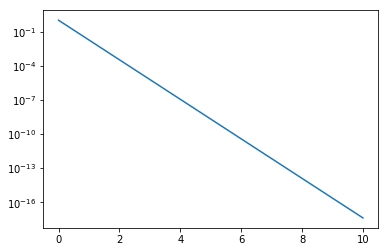

In [4]:
r = 4
def func(y_0,x_0, f_args = {}):
    return -r*y_0


yn,xn =  rk4(np.array([1]),0,func,0.1,100)
plt.yscale('log')
plt.plot(xn,yn)

(301, 12)


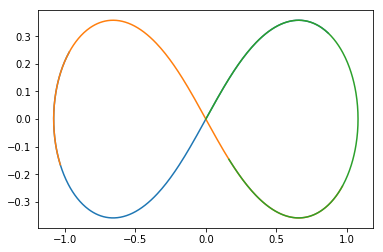

In [39]:
m1 = 1
m2 = 1
m3 = 1
G = 1
def func3body(y_0,x_0, f_args = {}):
    var = np.ones(12)
    a = np.sqrt((y_0[0]-y_0[4])**2+(y_0[1]-y_0[5])**2)**3
    b = np.sqrt((y_0[0]-y_0[8])**2+(y_0[1]-y_0[9])**2)**3
    c = np.sqrt((y_0[8]-y_0[4])**2+(y_0[9]-y_0[5])**2)**3
    var[0] = y_0[2]
    var[1] = y_0[3]
    var[2] = -G*m2* (y_0[0]-y_0[4])/a - G*m3*(y_0[0]-y_0[8])/b
    var[3] = -G*m2* (y_0[1]-y_0[5])/a - G*m3*(y_0[1]-y_0[9])/b
    var[4] = y_0[6]
    var[5] = y_0[7]
    var[6] = -G*m3* (y_0[4]-y_0[8])/c - G*m1*(y_0[4]-y_0[0])/a
    var[7] = -G*m3* (y_0[5]-y_0[9])/c - G*m1*(y_0[5]-y_0[1])/a
    var[8] = y_0[10]
    var[9] = y_0[11]
    var[10] = -G*m1* (y_0[8]-y_0[0])/b - G*m2*(y_0[8]-y_0[4])/c
    var[11] = -G*m1* (y_0[9]-y_0[1])/b - G*m2*(y_0[9]-y_0[5])/c
    return var
    

y0 = np.array([-0.97000436,0.24308753,-0.46620368,-0.43236573,0.97000436,-0.24308753,-0.46620368,-0.43236573,0,0,0.93240737,0.86473146])
x0 = 0
n = 300
yn, xn = rk4(y0,x0,func3body,0.01,n)
print(yn.shape)
y1x = np.ones(n)
y1y = np.ones(n)
y2x = np.ones(n)
y2y = np.ones(n)
y3x = np.ones(n)
y3y = np.ones(n)
for i in range(0,n,1):
    y1x[i] = yn[i][0]
    y1y[i] = yn[i][1]
    y2x[i] = yn[i][4]
    y2y[i] = yn[i][5]
    y3x[i] = yn[i][8]
    y3y[i] = yn[i][9]
    
plt.plot(y1x,y1y)    
plt.plot(y2x,y2y) 
plt.plot(y3x,y3y) 
    

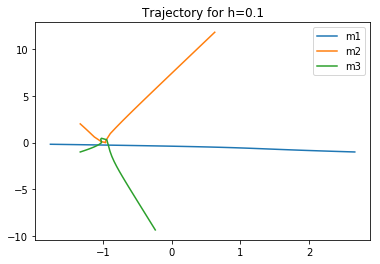

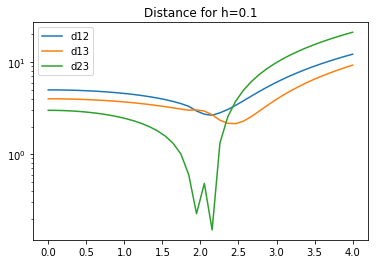

For h=0.1 the minimum distance between m1 and m2 is 2.647 units at t=2.1
For h=0.1 the minimum distance between m1 and m3 is 3.392 units at t=2.4
For h=0.1 the minimum distance between m2 and m3 is 2.647 units at t=2.1


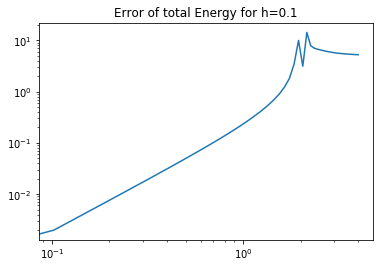

___________________________________________________________________________________________________


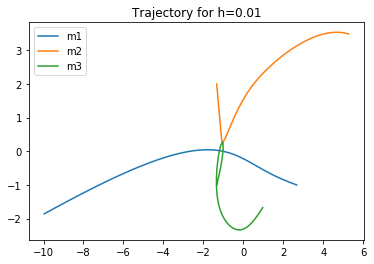

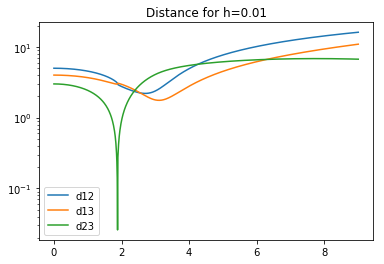

For h=0.01 the minimum distance between m1 and m2 is 2.202 units at t=2.7
For h=0.01 the minimum distance between m1 and m3 is 2.542 units at t=3.1
For h=0.01 the minimum distance between m2 and m3 is 3.024 units at t=1.88


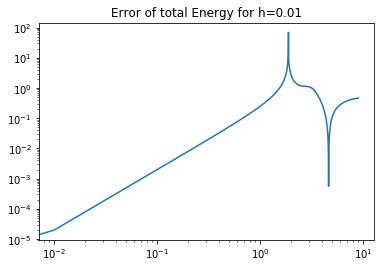

___________________________________________________________________________________________________


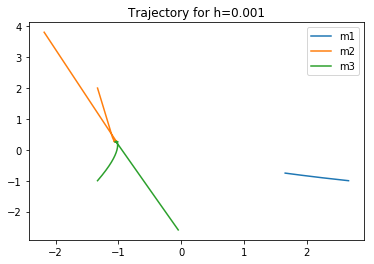

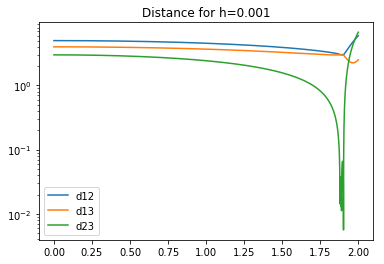

For h=0.001 the minimum distance between m1 and m2 is 2.986 units at t=1.902
For h=0.001 the minimum distance between m1 and m3 is 4.782 units at t=1.964
For h=0.001 the minimum distance between m2 and m3 is 2.986 units at t=1.902


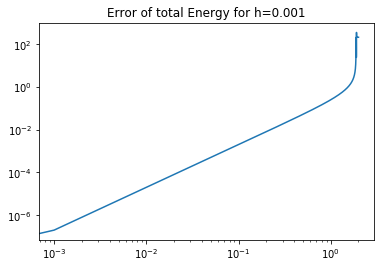

___________________________________________________________________________________________________


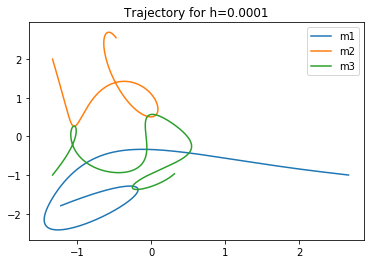

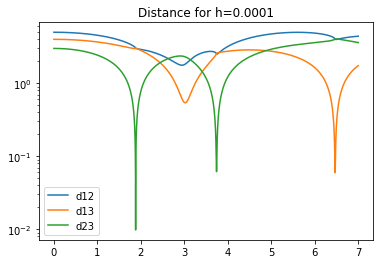

For h=0.0001 the minimum distance between m1 and m2 is 1.767 units at t=2.944
For h=0.0001 the minimum distance between m1 and m3 is 4.015 units at t=6.468
For h=0.0001 the minimum distance between m2 and m3 is 3.022 units at t=1.879


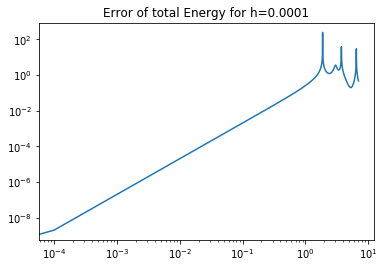

___________________________________________________________________________________________________


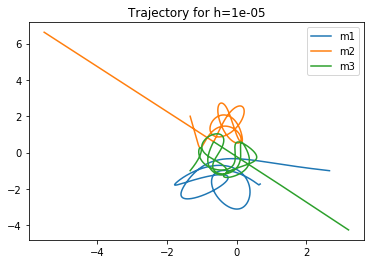

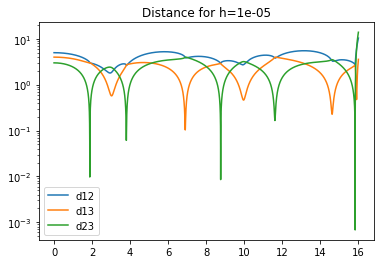

For h=1e-05 the minimum distance between m1 and m2 is 1.799 units at t=2.945
For h=1e-05 the minimum distance between m1 and m3 is 3.915 units at t=6.898
For h=1e-05 the minimum distance between m2 and m3 is 2.713 units at t=15.83


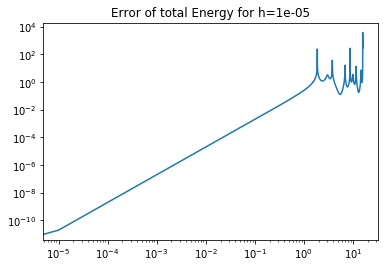

___________________________________________________________________________________________________


In [217]:
m1 = 3
m2 = 4
m3 = 5

#Schwerpunkt bei (4/3,1)
y0 = np.array([8/3,-1,0,0,-4/3,2,0,0,-4/3,-1,0,0])
x0 = 0

for h, t in zip([0.1,0.01,0.001,0.0001,0.00001],[4,9,2,7,16]):
    n = int(t/h)
    yn, xn = rk4(y0,x0,func3body,h,n)

    #Motion
    y1x = np.ones(n)
    y1y = np.ones(n)
    y2x = np.ones(n)
    y2y = np.ones(n)
    y3x = np.ones(n)
    y3y = np.ones(n)
    for i in range(0,n,1):
        y1x[i] = yn[i][0]
        y1y[i] = yn[i][1]
        y2x[i] = yn[i][4]
        y2y[i] = yn[i][5]
        y3x[i] = yn[i][8]
        y3y[i] = yn[i][9]
    plt.figure()
    plt.title("Trajectory for h="+str(h))
    plt.plot(y1x,y1y,label="m1")
    plt.plot(y2x,y2y,label="m2") 
    plt.plot(y3x,y3y,label="m3")    
    plt.legend()
    plt.show() 

    #Distances
    d12 = np.ones(n)
    d13 = np.ones(n)
    d23 = np.ones(n)
    for i in range(0,n,1):
        d12[i]=np.sqrt((y1x[i]-y2x[i])**2+(y1y[i]-y2y[i])**2)
        d13[i]=np.sqrt((y1x[i]-y3x[i])**2+(y1y[i]-y3y[i])**2)
        d23[i]=np.sqrt((y2x[i]-y3x[i])**2+(y2y[i]-y3y[i])**2)
    
    plt.figure()
    x = np.linspace(0,t,n)
    plt.title("Distance for h="+str(h))
    plt.plot(x,d12,label="d12")
    plt.plot(x,d13,label="d13")
    plt.plot(x,d23,label="d23")
    #plt.xscale('log') <-- logarithmic scale doesn't make much sense here
    plt.yscale('log')
    plt.legend()
    plt.show() 
    
    #Minimum
    n_min12 = np.argmin(d12)
    t_min12 = round(n_min12*h,3)
    min_d12 = round(d12[n_min12],3)
    print("For h="+str(h)+" the minimum distance between m1 and m2 is "+str(min_d12)+" units at t="+str(t_min12))
    
    n_min13 = np.argmin(d13)
    t_min13 = round(n_min13*h,3)
    min_d13 = round(d12[n_min13],3)
    print("For h="+str(h)+" the minimum distance between m1 and m3 is "+str(min_d13)+" units at t="+str(t_min13))
    
    n_min23 = np.argmin(d23)
    t_min23 = round(n_min23*h,3)
    min_d23 = round(d12[n_min23],3)
    print("For h="+str(h)+" the minimum distance between m2 and m3 is "+str(min_d23)+" units at t="+str(t_min23))
    
    #Energie
    E_pot12 = np.ones(n)
    E_pot21 = np.ones(n)
    E_pot13 = np.ones(n)
    E_pot31 = np.ones(n)
    E_pot23 = np.ones(n)
    E_pot32 = np.ones(n)
    E_pot_ges = np.ones(n)
    
    E_kin1x = np.ones(n)
    E_kin1y = np.ones(n)
    E_kin2x = np.ones(n)
    E_kin2y = np.ones(n)
    E_kin3x = np.ones(n)
    E_kin3y = np.ones(n)
    E_kin_ges= np.ones(n)
    
    E_ges = np.ones(n)
    error = np.ones(n)
    
    for i in range (0,n,1):
        E_pot12[i] = G*m1*m2/np.sqrt((yn[i][4]-yn[i][0])**2+(yn[i][5]-yn[i][1])**2)
        E_pot21[i] = G*m2*m1/np.sqrt((yn[i][0]-yn[i][4])**2+(yn[i][1]-yn[i][5])**2)
        E_pot13[i] = G*m1*m3/np.sqrt((yn[i][8]-yn[i][0])**2+(yn[i][9]-yn[i][1])**2)
        E_pot31[i] = G*m3*m1/np.sqrt((yn[i][0]-yn[i][8])**2+(yn[i][1]-yn[i][9])**2)
        E_pot23[i] = G*m2*m3/np.sqrt((yn[i][8]-yn[i][4])**2+(yn[i][9]-yn[i][5])**2)
        E_pot32[i] = G*m3*m2/np.sqrt((yn[i][4]-yn[i][8])**2+(yn[i][5]-yn[i][9])**2)
        E_pot_ges[i] = E_pot12[i]+E_pot21[i]+E_pot13[i]+E_pot31[i]+E_pot23[i]+E_pot32[i]
        E_pot0 = E_pot_ges[0]
        
        E_kin1x[i] = 0.5*m1*(yn[i][2])**2
        E_kin1y[i] = 0.5*m1*(yn[i][3])**2
        E_kin2x[i] = 0.5*m2*(yn[i][6])**2
        E_kin2y[i] = 0.5*m2*(yn[i][7])**2
        E_kin3x[i] = 0.5*m3*(yn[i][10])**2
        E_kin3y[i] = 0.5*m3*(yn[i][11])**2
        E_kin_ges[i] = E_kin1x[i]+E_kin1y[i]+E_kin2x[i]+E_kin2y[i]+E_kin3x[i]+E_kin3y[i]
        
        E_ges[i] = abs(E_pot_ges[i])+abs(E_kin_ges[i])
        error[i] = abs((E_ges[i]-E_pot0))/abs(E_pot0)

    plt.figure()
    plt.plot(x,error)
    plt.title("Error of total Energy for h="+str(h))
    plt.yscale('log')
    plt.xscale('log')
    plt.show() 
    print("___________________________________________________________________________________________________")